# Explore here

It's recommended to use this notebook for exploration purposes.

In [1]:
import requests
import pandas as pd
import time


#url="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
url="https://es.wikipedia.org/wiki/Leucocito"
#https://es.wikipedia.org/wiki/Leucocito 
#(tabla de tipos de leucocitos y gráfica de la relación del diámetro y porcentaje aproximado de adultos#
response= requests.get(url)
print(response)
print(response.text)



<Response [200]>


In [22]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(response.text, 'html.parser')
#print(soup)

#tabla de tipos de leucocitos
tabla_tipos = soup.find_all("table", class_="wikitable")
#print(tabla_tipos)
#print(type(tabla_tipos))

#Vamos a transformarlo en un df
data = []

for table in tabla_tipos:
    rows = table.find_all('tr')
    header = [header.text.strip() for header in rows[0].find_all('th')]
    
    for row in rows[1:]:
        values = [value.text.strip() for value in row.find_all('td')]
        data.append(dict(zip(header, values)))

df = pd.DataFrame(data)

# Mostrar el DataFrame
print(df.columns)

print(df)
#gráfica de la relación del diámetro y 
#porcentaje aproximado de adultos



<class 'bs4.element.ResultSet'>
Index(['Tipo', 'Apariencia microscópica', 'Diagrama',
       'Porcentaje aproximado en adultos', 'Diámetro (μm)',
       '[7]​ Principal objetivo', '[4]​ Núcleo', '[4]​ Gránulos',
       '[4]​ Vida media[7]​'],
      dtype='object')
         Tipo Apariencia microscópica Diagrama  \
0  Neutrófilo                                    
1  Eosinófilo                                    
2    Basófilo                                    
3   Linfocito                                    
4    Monocito                                    

  Porcentaje aproximado en adultos  \
0                              62%   
1                             2.3%   
2                             0.4%   
3                              30%   
4                             5.3%   

                                       Diámetro (μm)  \
0                                              10-12   
1                                              10-12   
2                                    

0    10
1    10
2    12
3     7
4    12
Name: Diametro min, dtype: object 0     62
1    2.3
2    0.4
3     30
4    5.3
Name: %, dtype: object


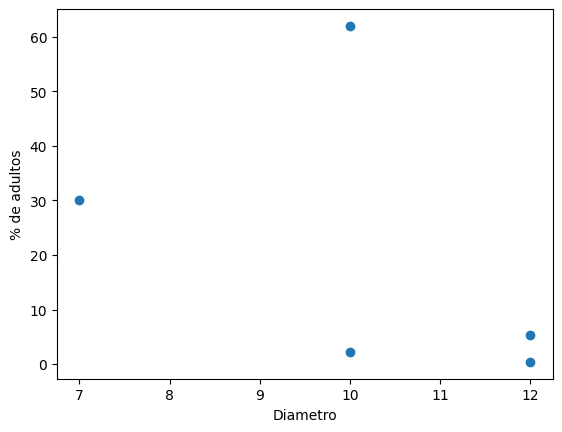

In [23]:
#Vamos a hacer un gráfico del diámetro por el % de adultos
import matplotlib.pyplot as plt

#1º Vamos a obtener los números de la columna Diametro [4]
df['Diametro min']= df.iloc[:,4].str.extract('(\d+(\.\d+)?)', expand=True)[0]

#2º Lo mismo de la columna de % para poder convertirlo en número
df['%']= df.iloc[:,3].str.extract('(\d+(\.\d+)?)', expand=True)[0]
print(df['Diametro min'],df['%'])

a=df['Diametro min']
b=df['%']
#Las transformamos en números
df['%']=[float(valor) for valor in b]
df['Diametro min']=[float(valor) for valor in a]

#Hacemos un gráfico de puntos

plt.scatter(df['Diametro min'],df['%'])
plt.xlabel('Diametro')
plt.ylabel('% de adultos')
plt.show()
